In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

jobs = pd.read_csv('../data/salaries.csv')

In [72]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


jobs = jobs[jobs['work_year'] != 2025]

jobs

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4544,2024,MI,FT,Business Analyst,25860,USD,25860,IN,100,UA,M
14516,2024,EN,FT,Data Quality Specialist,16100,EUR,17888,PT,100,US,L
15836,2024,SE,FT,Data Developer,131958,USD,131958,US,0,US,M
15837,2024,SE,FT,Data Developer,79175,USD,79175,US,0,US,M
15840,2024,EN,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<BarContainer object of 5 artists>

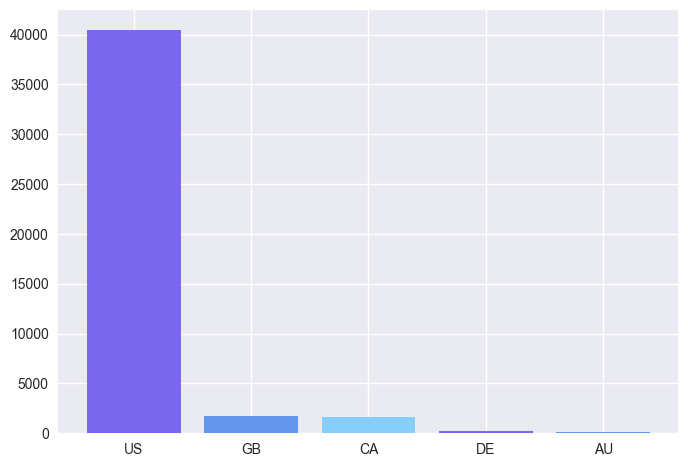

In [80]:
countries = pd.DataFrame(jobs['company_location'].value_counts())
countries = countries.reset_index()

plt.bar(data=countries.iloc[:5], x='company_location', height='count', color=['#7B68EE', '#6495ED', '#87CEFA'])

In [74]:
main = countries[countries['company_location'] != "US"] # & (countries['company_location'] != "CA") & (countries['company_location'] != "IN")'''
main = main.iloc[:9]
others = countries.iloc[9:]['count'].sum()
others
main

,company_location,count
1,GB,1704
2,CA,1618
3,DE,182
4,AU,164
5,ES,153
6,FR,145
7,NL,115
8,IN,99
9,LT,96


([<matplotlib.patches.Wedge at 0x23d0f34ec10>,
 [Text(-0.9322142534776542, 0.5839320042719873, 'GB'),
  Text(-0.17420532210388506, -1.086118090149815, 'CA'),
  Text(0.8678645699235534, -0.6758780128628283, 'DE'),
  Text(0.9874365605736921, -0.4847360506939807, 'AU'),
  Text(1.108878227266747, -0.3047770941093788, 'ES'),
  Text(1.095409767255302, -0.10038646224309876, 'FR'),
  Text(1.0978245432787315, 0.06914674377615243, 'NL'),
  Text(1.0802263977961415, 0.20763171603676636, 'IN'),
  Text(1.0490290494191175, 0.3309653357601413, 'LT'),
  Text(0.6248305605662519, 0.9053103172848875, 'Others')],
 [Text(-0.5084805018969022, 0.3185083659665385, '32.2%'),
  Text(-0.0950210847839373, -0.5924280491726264, '30.6%'),
  Text(0.47338067450375637, -0.36866073428881546, '3.4%'),
  Text(0.538601760312923, -0.2644014821967167, '3.1%'),
  Text(0.6267572588899004, -0.17226531406182277, '2.9%'),
  Text(0.5974962366847102, -0.05475625213259932, '2.7%'),
  Text(0.5988133872429444, 0.037716405696083144, '2.

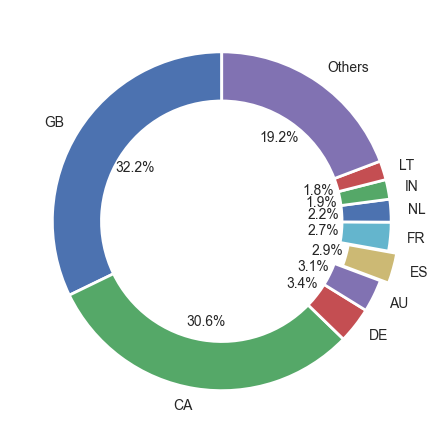

In [93]:
sizes = main['count'].tolist() + [others]
labels = main['company_location'].tolist() + ['Others']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white','width': 0.29}, explode=[0.05 if label == 'ES' else 0 for label in labels])
